In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adadelta
from keras.utils import to_categorical, plot_model, model_to_dot, print_summary

from IPython.display import SVG

import matplotlib.pyplot as plt

from google.colab import files

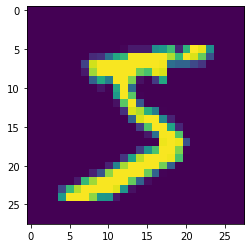

In [0]:
batch_size = 86
num_classes = 10
epochs = 12

# Loading the data and split in training and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Showing the first image

plt.imshow(X_train[0])

In [0]:
# Reshaphing data to fit model

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalizing the data to train faster

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(f'{X_train.shape[0]} train samples')
print(f'{X_test.shape[0]} test samples')


60000 train samples
10000 test samples


In [0]:
# Converting class vectors to binary class. One-hot encode target column
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Building the model

model = Sequential()
model.add(Dense(800, activation = 'relu', input_shape = (784, )))
#model.add(Dropout(0.2))
model.add(Dense(800, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
# Compiling the model

model.compile(loss = 'categorical_crossentropy', optimizer = Adadelta(), metrics = ['accuracy'])

In [0]:
# Training the model

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.2181 - acc: 0.9330 - val_loss: 0.1021 - val_acc: 0.9671
Epoch 2/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0773 - acc: 0.9759 - val_loss: 0.0732 - val_acc: 0.9770
Epoch 3/12
60000/60000 [==============================] - 5s 92us/step - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0668 - val_acc: 0.9785
Epoch 4/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0312 - acc: 0.9906 - val_loss: 0.0615 - val_acc: 0.9821
Epoch 5/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0615 - val_acc: 0.9827
Epoch 6/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0570 - val_acc: 0.9845
Epoch 7/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0709 - val_ac

In [0]:
# Evaluating the model

score = model.evaluate(X_test, Y_test, verbose = 0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.06495297506726501
Test accuracy: 0.9848


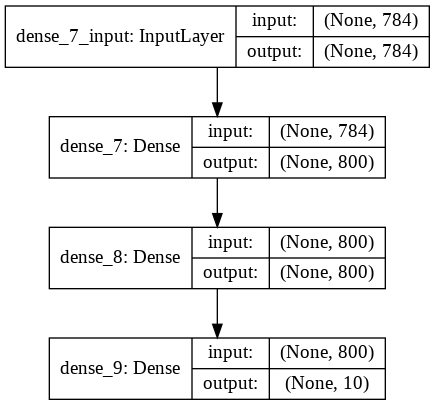

In [0]:
# Plot the model
pltmodel = plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
pltmodel

In [0]:
#open('arquitectura.png', 'wb').write(pltmodel.data)
#files.download("arquitectura.png")

In [0]:
# Summary of the model
print_summary(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_8 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


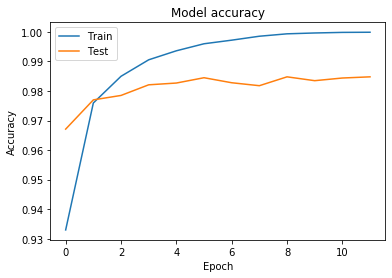

<Figure size 1440x1280 with 0 Axes>

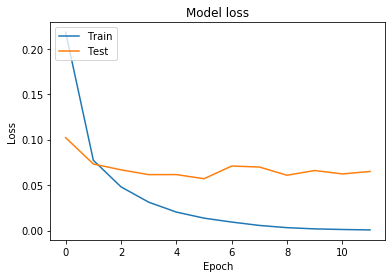

<Figure size 1440x1280 with 0 Axes>

In [0]:
# Plot training and validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()

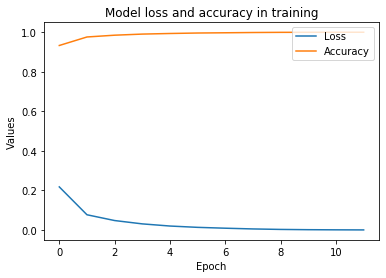

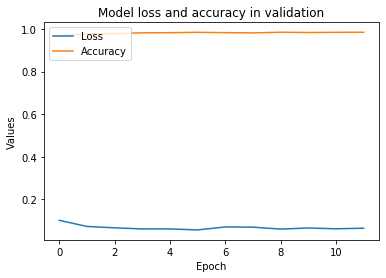

In [0]:
# Plot training loss and accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('Model loss and accuracy in training')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc = 'upper right')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('Model loss and accuracy in validation')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc = 'upper left')
plt.show()